In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import numpy as np
import statsmodels.api as sm

In [4]:
df=pd.read_csv('Rennes-Paris.csv', header=None)
df.columns=["date","heure","depart","arrivee","date_depart","heure_depart","heure_arrivee","prix","type"]
df["date_heure"]=df["date"].map(str) + df["heure"].map(str)
df["timestamp"]=df["date_heure"].apply(lambda x:time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d%H:%M:%S").timetuple()))
a=df["date"].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))
b=df["date_depart"].apply(lambda y:datetime.datetime.strptime(y, "%Y-%m-%d"))
df["Jdepart"]=b-a
df["Jdepart"]=df["Jdepart"].apply(lambda x:int(str(x).split(" ")[0]))

a=df["heure_depart"].apply(lambda x:datetime.datetime.strptime(x, "%H:%M"))
b=df["heure_arrivee"].apply(lambda y:datetime.datetime.strptime(y, "%H:%M"))
df["temps"]=b-a
df["weekend"]=df["date_depart"].apply(lambda y:datetime.datetime.strptime(y, "%Y-%m-%d").weekday()>4)
df["night"]=df["heure_depart"].apply(lambda y:datetime.datetime.strptime(y, "%H:%M")>datetime.datetime.strptime("16:00", "%H:%M"))
df["n_semaine"]=df["date_depart"].apply(lambda y:int(datetime.datetime.strptime(y, "%Y-%m-%d").weekday()))
df["n_heure_depart"]=df["heure_depart"].apply(lambda y: int(y.split(":")[0]) )
df["n_heure_arrivee"]=df["heure_arrivee"].apply(lambda y: int(y.split(":")[0]) )
df["n_heure"]=df["heure"].apply(lambda y: int(y.split(":")[0]) )

In [5]:
ntrain=[]
def enumerate_train(test):
    global ntrain
    for i in test:
        if(i not in ntrain):
            ntrain.append(i)
numero=df["date_depart"].map(str) + df["heure_depart"].map(str)
enumerate_train(numero)


In [6]:
df["numero1"]=df["date_depart"].map(str) + df["heure_depart"].map(str)
df["numero"]=df["numero1"].apply(lambda y: ntrain.index(y) )#finir train
df=df.drop(columns=["numero1"])
df=df.drop(columns=["date_heure"])
df
# n_heure,Jdepart,n_semaine,prix,n_heure_depart

,date,heure,depart,arrivee,date_depart,heure_depart,heure_arrivee,prix,type,timestamp,Jdepart,temps,weekend,night,n_semaine,n_heure_depart,n_heure_arrivee,n_heure,numero
0,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,14:35,16:04,16.0,1,1.544554e+09,1,01:29:00,False,False,2,14,16,19,0
1,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,09:52,11:35,30.0,1,1.544554e+09,1,01:43:00,False,False,2,9,11,19,1
2,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,21:35,23:04,35.0,1,1.544554e+09,1,01:29:00,False,True,2,21,23,19,2
3,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,19:05,20:34,56.0,1,1.544554e+09,1,01:29:00,False,True,2,19,20,19,3
4,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,19:52,22:04,56.0,1,1.544554e+09,1,02:12:00,False,True,2,19,22,19,4
5,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,13:37,15:04,63.0,1,1.544554e+09,1,01:27:00,False,False,2,13,15,19,5
6,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,11:35,13:04,72.0,1,1.544554e+09,1,01:29:00,False,False,2,11,13,19,6
7,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,05:36,07:50,76.0,1,1.544554e+09,1,02:14:00,False,False,2,5,7,19,7
8,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,07:52,09:50,76.0,1,1.544554e+09,1,01:58:00,False,False,2,7,9,19,8
9,2018-12-11,19:48:53,Rennes,Paris Montparnasse 1 Et 2,2018-12-12,08:37,10:04,76.0,1,1.544554e+09,1,01:27:00,False,False,2,8,10,19,9


ON garde les trains avec suffisament de data..

In [7]:
for i in range(0,615):
    if(len(df[df["numero"]==i]) < 50):
        df=df[df["numero"]!=i]
        
df=df[df["date_depart"]!="2018-12-11"]
df=df[df["date_depart"]!="2018-12-12"]
df=df[df["date_depart"]!="2018-12-13"]
df=df[df["date_depart"]!="2018-12-14"]
df=df[df["date_depart"]!="2018-12-15"]
df=df[df["date_depart"]!="2018-12-16"]
df=df[df["date_depart"]!="2018-12-17"]
df=df[df["date_depart"]!="2018-12-18"]
df=df[df["date_depart"]!="2018-12-19"]
df=df[df["date_depart"]!="2018-12-20"]
df=df[df["date_depart"]!="2019-01-10"]
df=df[df["date_depart"]!="2019-01-09"]
len(df.groupby("numero").last())

365

stats/affichage

In [8]:
print("train nuit (moy/med): %s/%s"%(np.mean(df[df["night"]==True]["prix"].tolist()),np.median(df[df["night"]==True]["prix"].tolist())))
print("train jour (moy/med): %s/%s"%(np.mean(df[df["night"]==False]["prix"].tolist()),np.median(df[df["night"]==False]["prix"].tolist())))

weekend=df[df["weekend"]==True]

print("train weekend(moy/med): %s/%s"%(np.mean(weekend["prix"].tolist()),np.median(weekend["prix"].tolist())))

notweekend=df[df["weekend"]==False]

print("train semaine (moy/med): %s/%s"%(np.mean(notweekend["prix"].tolist()),np.median(notweekend["prix"].tolist())))
print("train semaine et jour (moy/med): %s/%s"%(np.mean(notweekend[notweekend["night"]==False]["prix"].tolist()),np.median(notweekend[notweekend["night"]==False]["prix"].tolist())))
print("train semaine et nuit (moy/med): %s/%s"%(np.mean(notweekend[notweekend["night"]==True]["prix"].tolist()),np.median(notweekend[notweekend["night"]==True]["prix"].tolist())))
print("train weekend et nuit (moy/med): %s/%s"%(np.mean(weekend[weekend["night"]==True]["prix"].tolist()),np.median(weekend[weekend["night"]==True]["prix"].tolist())))
print("train weekend et jour (moy/med): %s/%s"%(np.mean(weekend[weekend["night"]==False]["prix"].tolist()),np.median(weekend[weekend["night"]==False]["prix"].tolist())))

train nuit (moy/med): 65.42051536564033/70.0
train jour (moy/med): 62.595112273424114/66.0
train weekend(moy/med): 68.50147772817623/71.4
train semaine (moy/med): 62.13298840804661/63.0
train semaine et jour (moy/med): 61.61274027669016/63.0
train semaine et nuit (moy/med): 62.881374006818966/66.0
train weekend et nuit (moy/med): 70.22672144197418/70.0
train weekend et jour (moy/med): 66.18565867806441/72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8ed6f64a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8ed6f6d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8ed6f6358>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8ed6fe5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8ed6fea20>],
 'means': []}

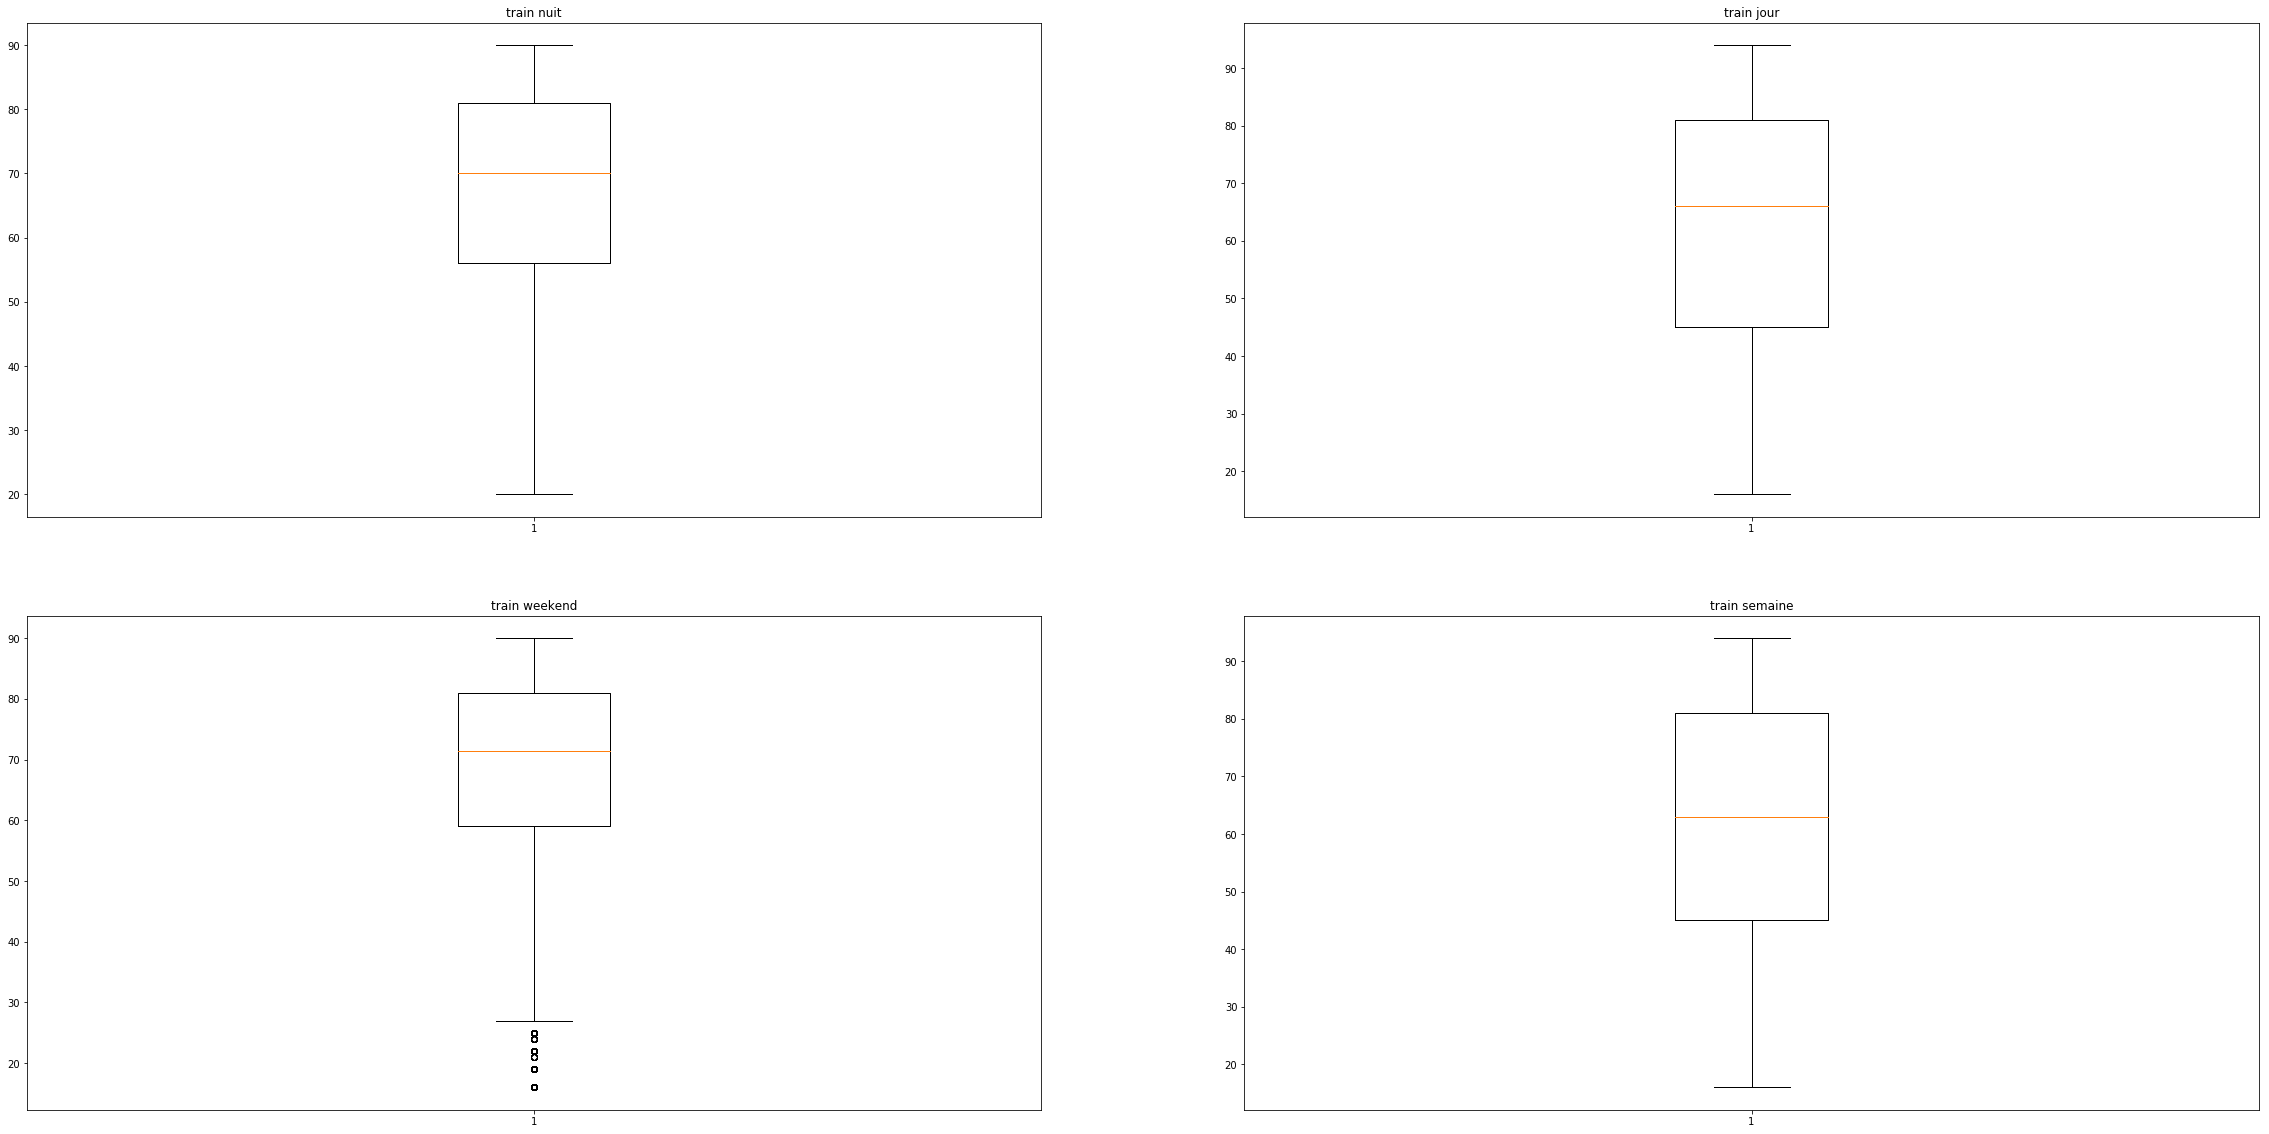

In [9]:
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
plt.title("train nuit")
plt.boxplot(df[df["night"]==True]["prix"])
plt.subplot(2,2,2)
plt.title("train jour")
plt.boxplot(df[df["night"]==False]["prix"])
plt.subplot(2,2,3)
plt.title("train weekend")
plt.boxplot(weekend["prix"])
plt.subplot(2,2,4)
plt.title("train semaine")
plt.boxplot(notweekend["prix"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8ee529160>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8ee529a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8ee51efd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8ee5332b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8ee5336d8>],
 'means': []}

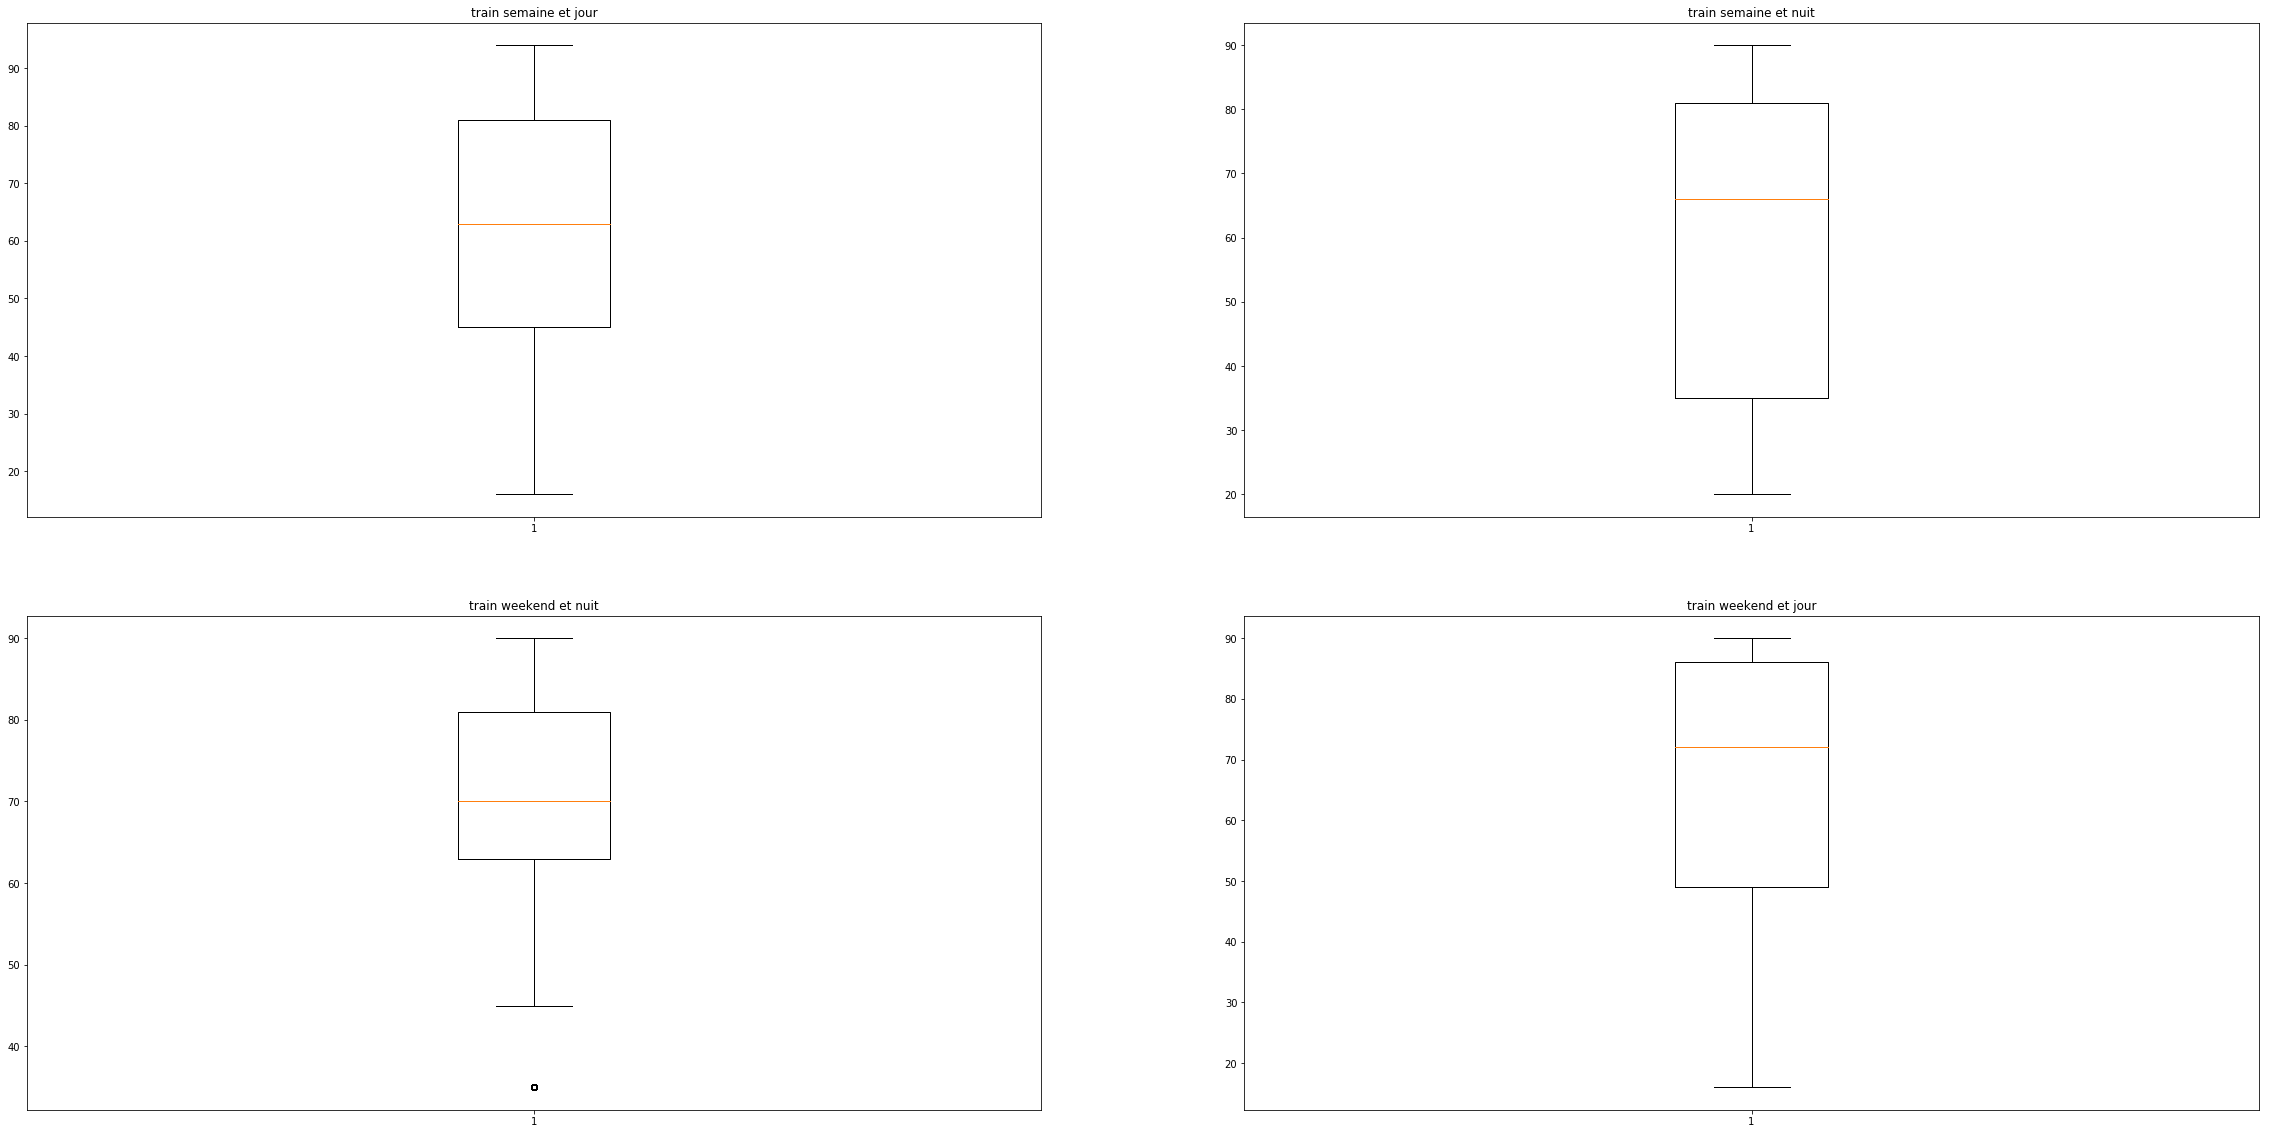

In [10]:
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
plt.title("train semaine et jour")
plt.boxplot(notweekend[notweekend["night"]==False]["prix"])
plt.subplot(2,2,2)
plt.title("train semaine et nuit")
plt.boxplot(notweekend[notweekend["night"]==True]["prix"])
plt.subplot(2,2,3)
plt.title("train weekend et nuit")
plt.boxplot(weekend[weekend["night"]==True]["prix"])
plt.subplot(2,2,4)
plt.title("train weekend et jour")
plt.boxplot(weekend[weekend["night"]==False]["prix"])

In [11]:
a=df[df["date_depart"]=="2018-12-23" ]

courbe evolution prix sur 1 mois pour 1 train d'1 j

,date,heure,depart,arrivee,date_depart,heure_depart,heure_arrivee,prix,type,timestamp,Jdepart,temps,weekend,night,n_semaine,n_heure_depart,n_heure_arrivee,n_heure,numero
741,2018-12-11,19:53:28,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544554e+09,26,01:29:00,True,True,6,18,20,19,499
1613,2018-12-11,20:54:39,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544558e+09,26,01:29:00,True,True,6,18,20,20,499
2485,2018-12-11,21:55:49,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544562e+09,26,01:29:00,True,True,6,18,20,21,499
3351,2018-12-11,22:57:01,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544565e+09,26,01:29:00,True,True,6,18,20,22,499
4219,2018-12-11,23:58:12,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544569e+09,26,01:29:00,True,True,6,18,20,23,499
5087,2018-12-12,00:59:24,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544573e+09,25,01:29:00,True,True,6,18,20,0,499
5952,2018-12-12,02:00:36,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544576e+09,25,01:29:00,True,True,6,18,20,2,499
7505,2018-12-12,04:02:54,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544584e+09,25,01:29:00,True,True,6,18,20,4,499
8370,2018-12-12,05:04:03,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544587e+09,25,01:29:00,True,True,6,18,20,5,499
9232,2018-12-12,06:05:11,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,70.0,1,1.544591e+09,25,01:29:00,True,True,6,18,20,6,499


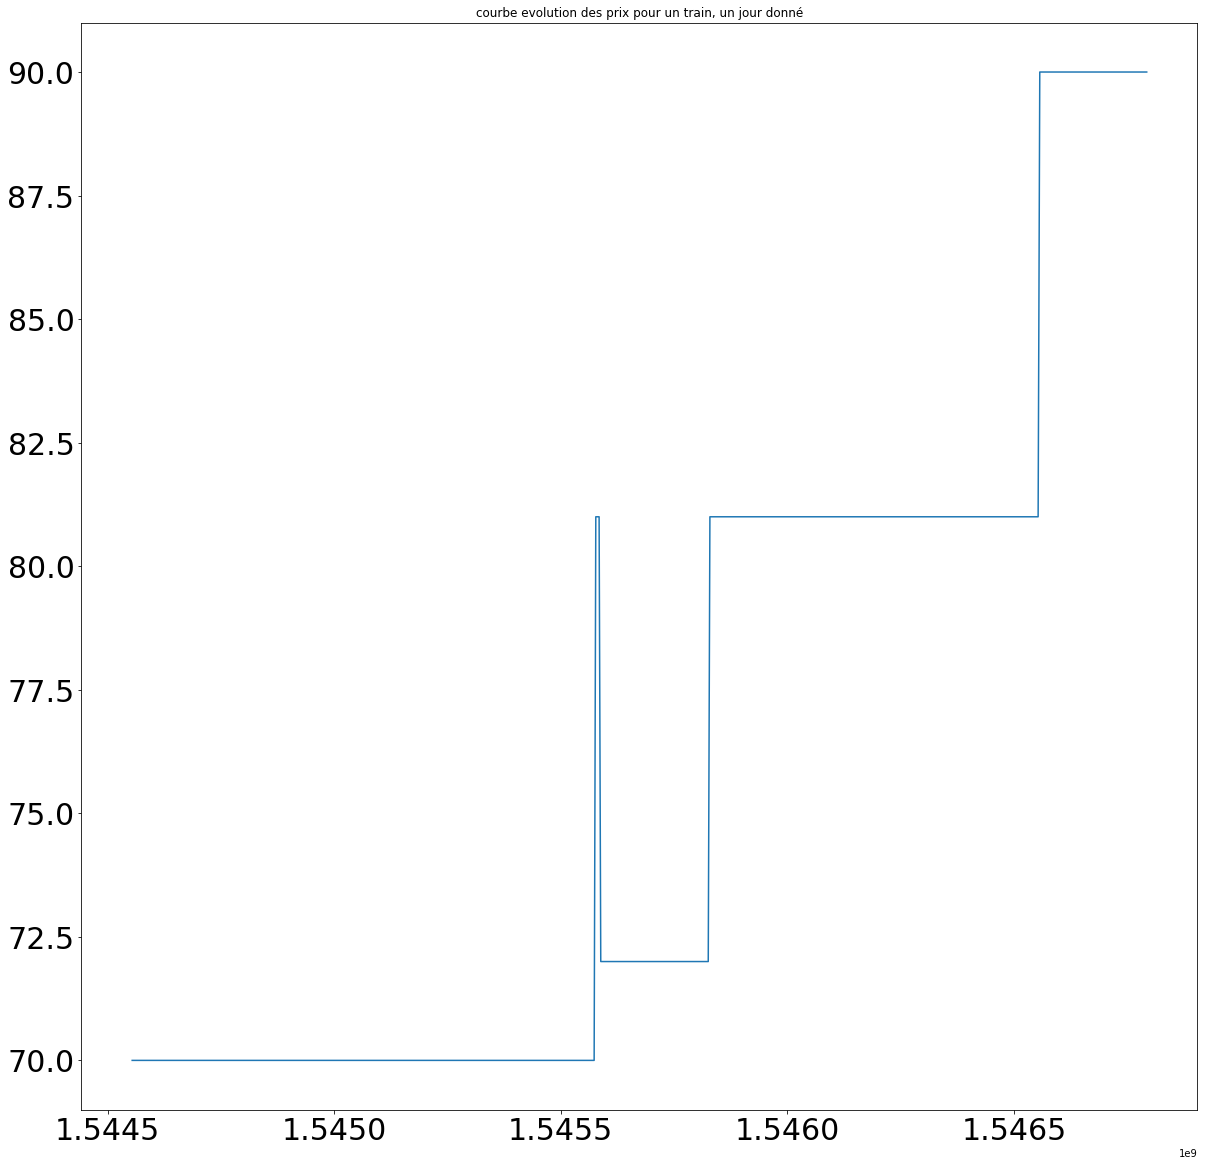

In [12]:
test=df[df["heure_depart"]=="18:35"]
test=test[test["date_depart"]=="2019-01-06"]
plt.figure(figsize=(20,20))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.plot(test["date"],test["prix"])
test2=test[test["date"]=="2019-01-06"]
test2["heure"].tolist()[0].split(":")
h=[]
for i in test2["timestamp"].tolist():
    h.append(i)
plt.title("courbe evolution des prix pour un train, un jour donné")
plt.plot(test["timestamp"],test["prix"])
test

In [17]:
t=test[test["prix"]<90]
t=t[t["prix"]>70]
t

,date,heure,depart,arrivee,date_depart,heure_depart,heure_arrivee,prix,type,timestamp,Jdepart,temps,weekend,night,n_semaine,n_heure_depart,n_heure_arrivee,n_heure,numero
189573,2018-12-23,16:01:40,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,81.0,1,1.545577e+09,14,01:29:00,True,True,6,18,20,16,499
190080,2018-12-23,17:02:31,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,81.0,1,1.545581e+09,14,01:29:00,True,True,6,18,20,17,499
190587,2018-12-23,18:03:21,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,81.0,1,1.545585e+09,14,01:29:00,True,True,6,18,20,18,499
191086,2018-12-23,19:04:10,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545588e+09,14,01:29:00,True,True,6,18,20,19,499
191580,2018-12-23,20:04:59,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545592e+09,14,01:29:00,True,True,6,18,20,20,499
191589,2018-12-23,20:04:59,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545592e+09,14,01:29:00,True,True,6,18,20,20,499
192084,2018-12-23,21:05:48,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545596e+09,14,01:29:00,True,True,6,18,20,21,499
192577,2018-12-23,22:06:38,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545599e+09,14,01:29:00,True,True,6,18,20,22,499
193068,2018-12-23,23:07:29,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545603e+09,14,01:29:00,True,True,6,18,20,23,499
193557,2018-12-24,00:08:18,Rennes,Paris Montparnasse 1 Et 2,2019-01-06,18:35,20:04,72.0,1,1.545606e+09,13,01:29:00,True,True,6,18,20,0,499


courbe d'evolution de tous les trains partant à 18h35

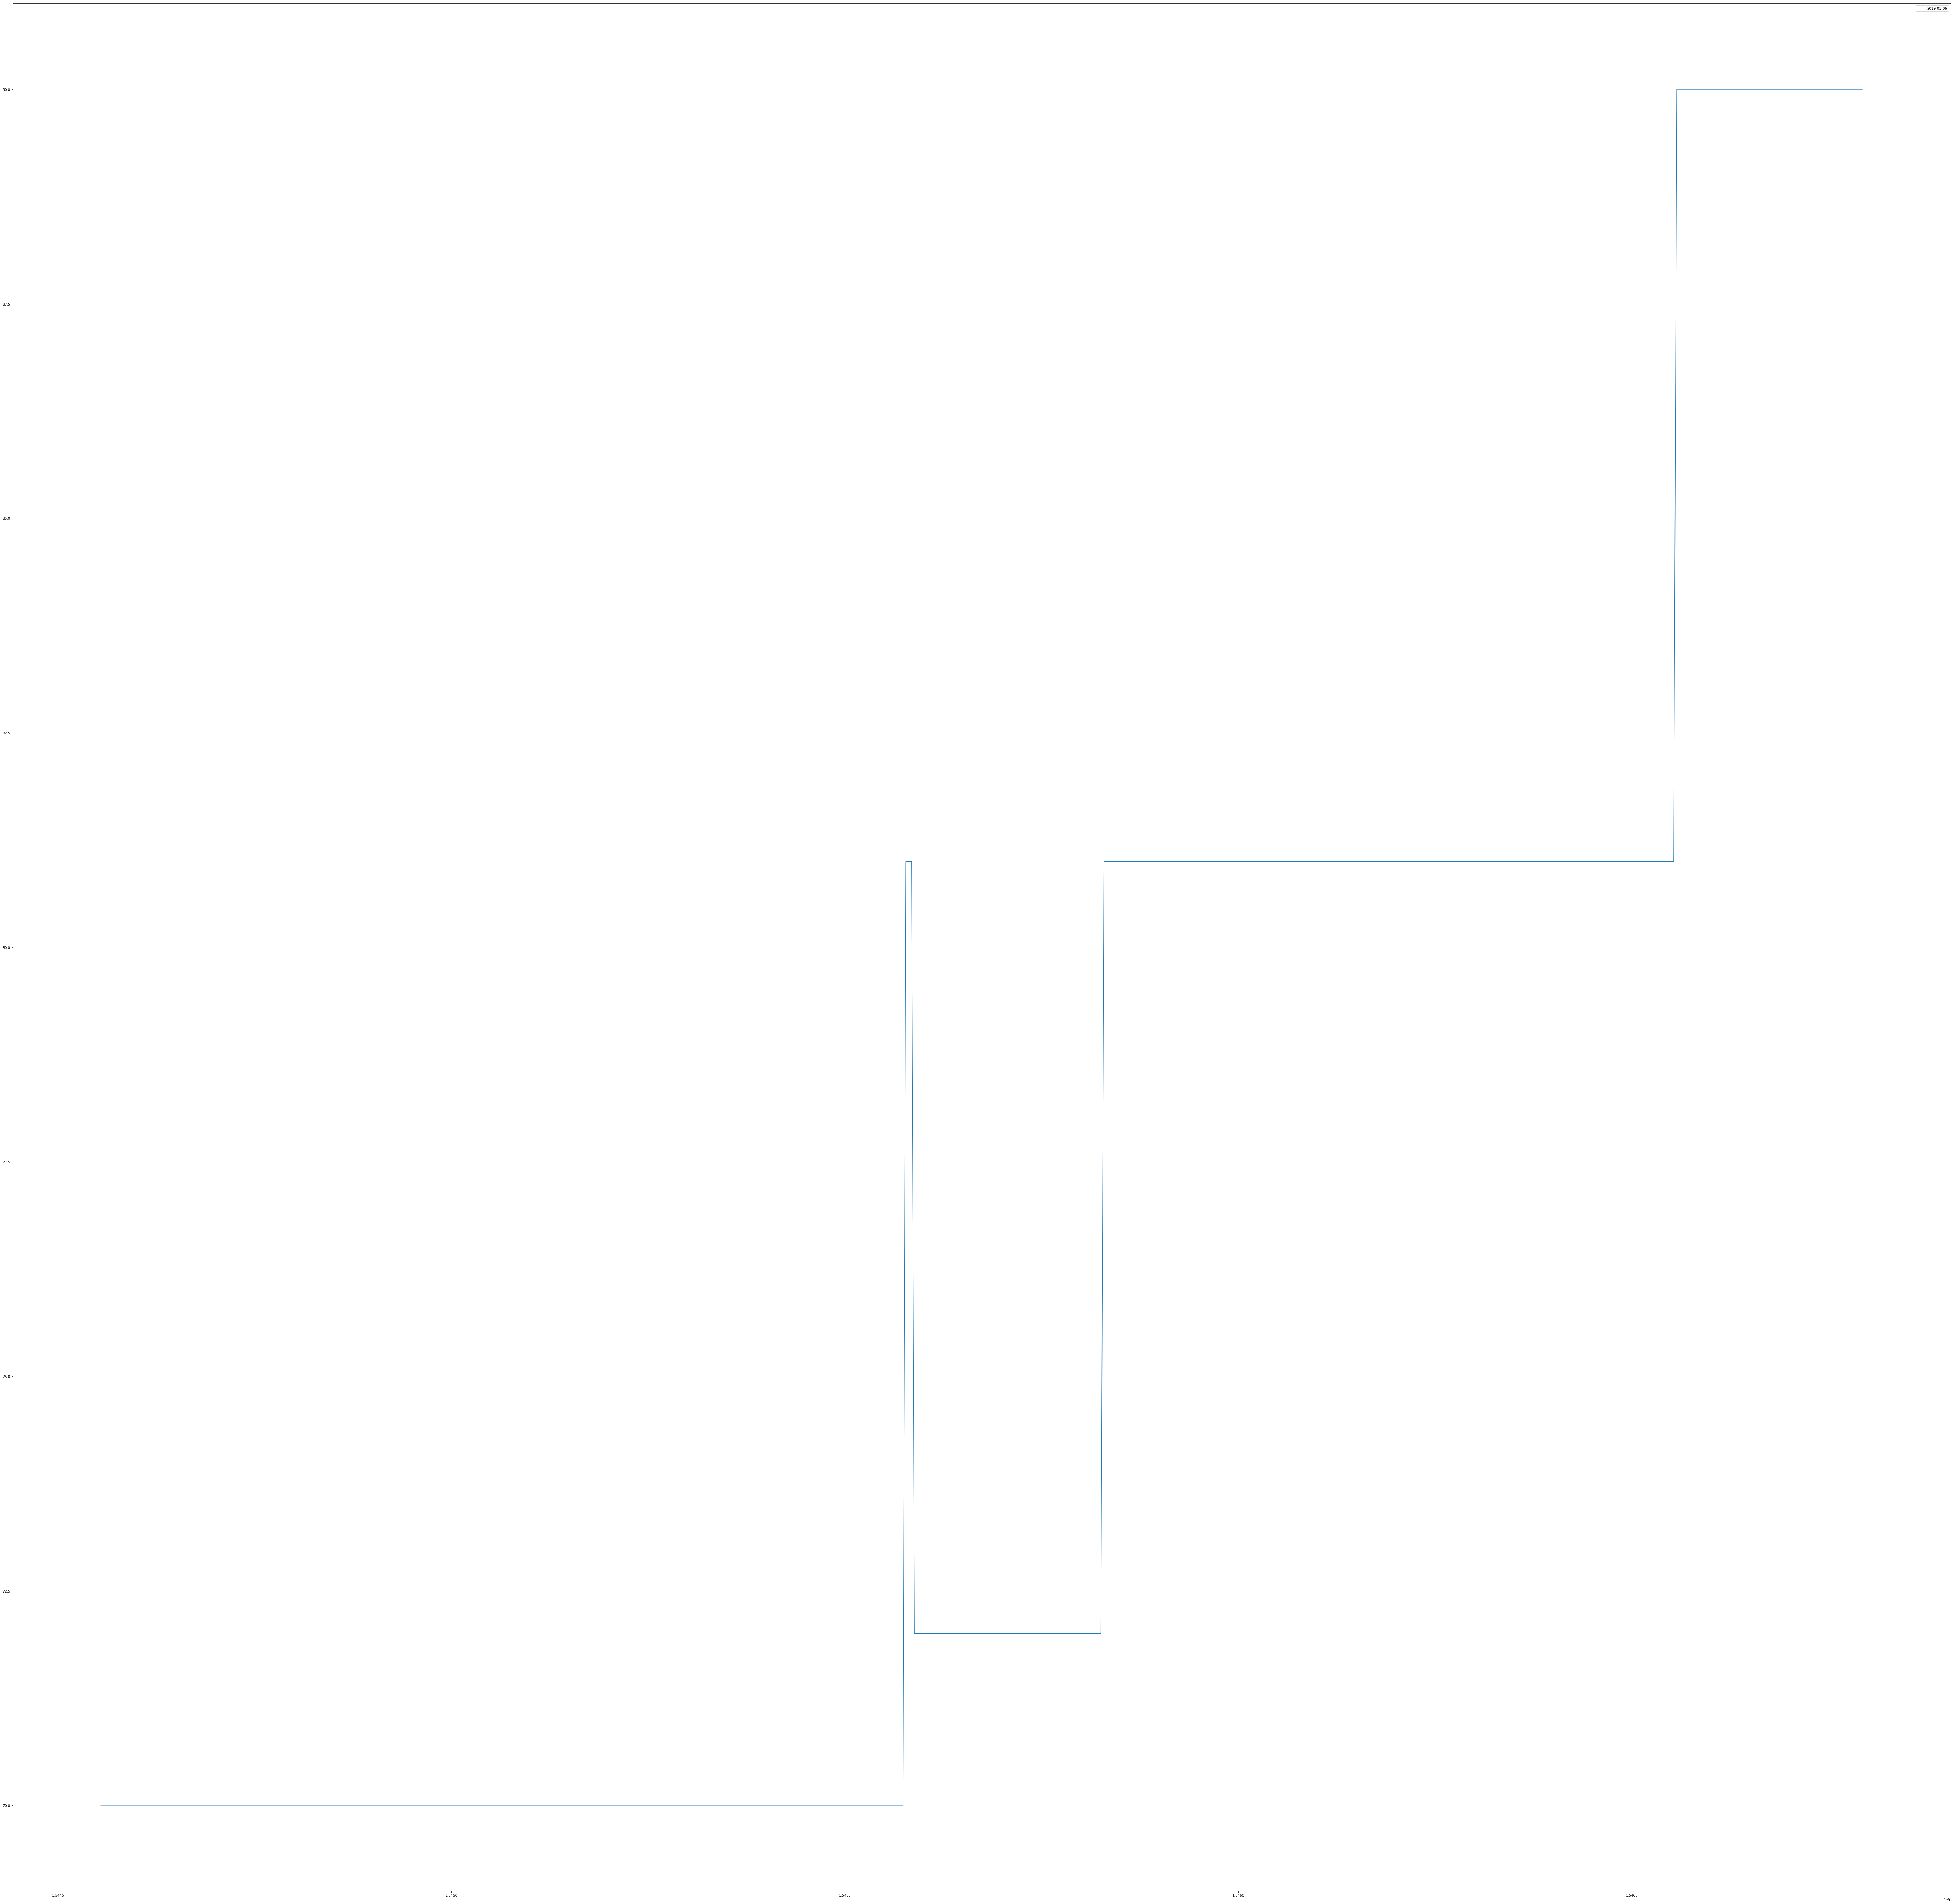

In [412]:
listetrain=df[df["heure_depart"]=="18:35"]
len(set(test["date_depart"].tolist()))

trains={}
plt.figure(figsize=(100,100))
for i in set(test["date_depart"].tolist()):
    trains[i]=listetrain[listetrain["date_depart"]==i]
    plt.plot(trains[i]["timestamp"],trains[i]["prix"],label=i)
plt.legend()

In [413]:
listetrain=df[df["heure_depart"]=="18:35"]
len(set(test["date_depart"].tolist()))

1

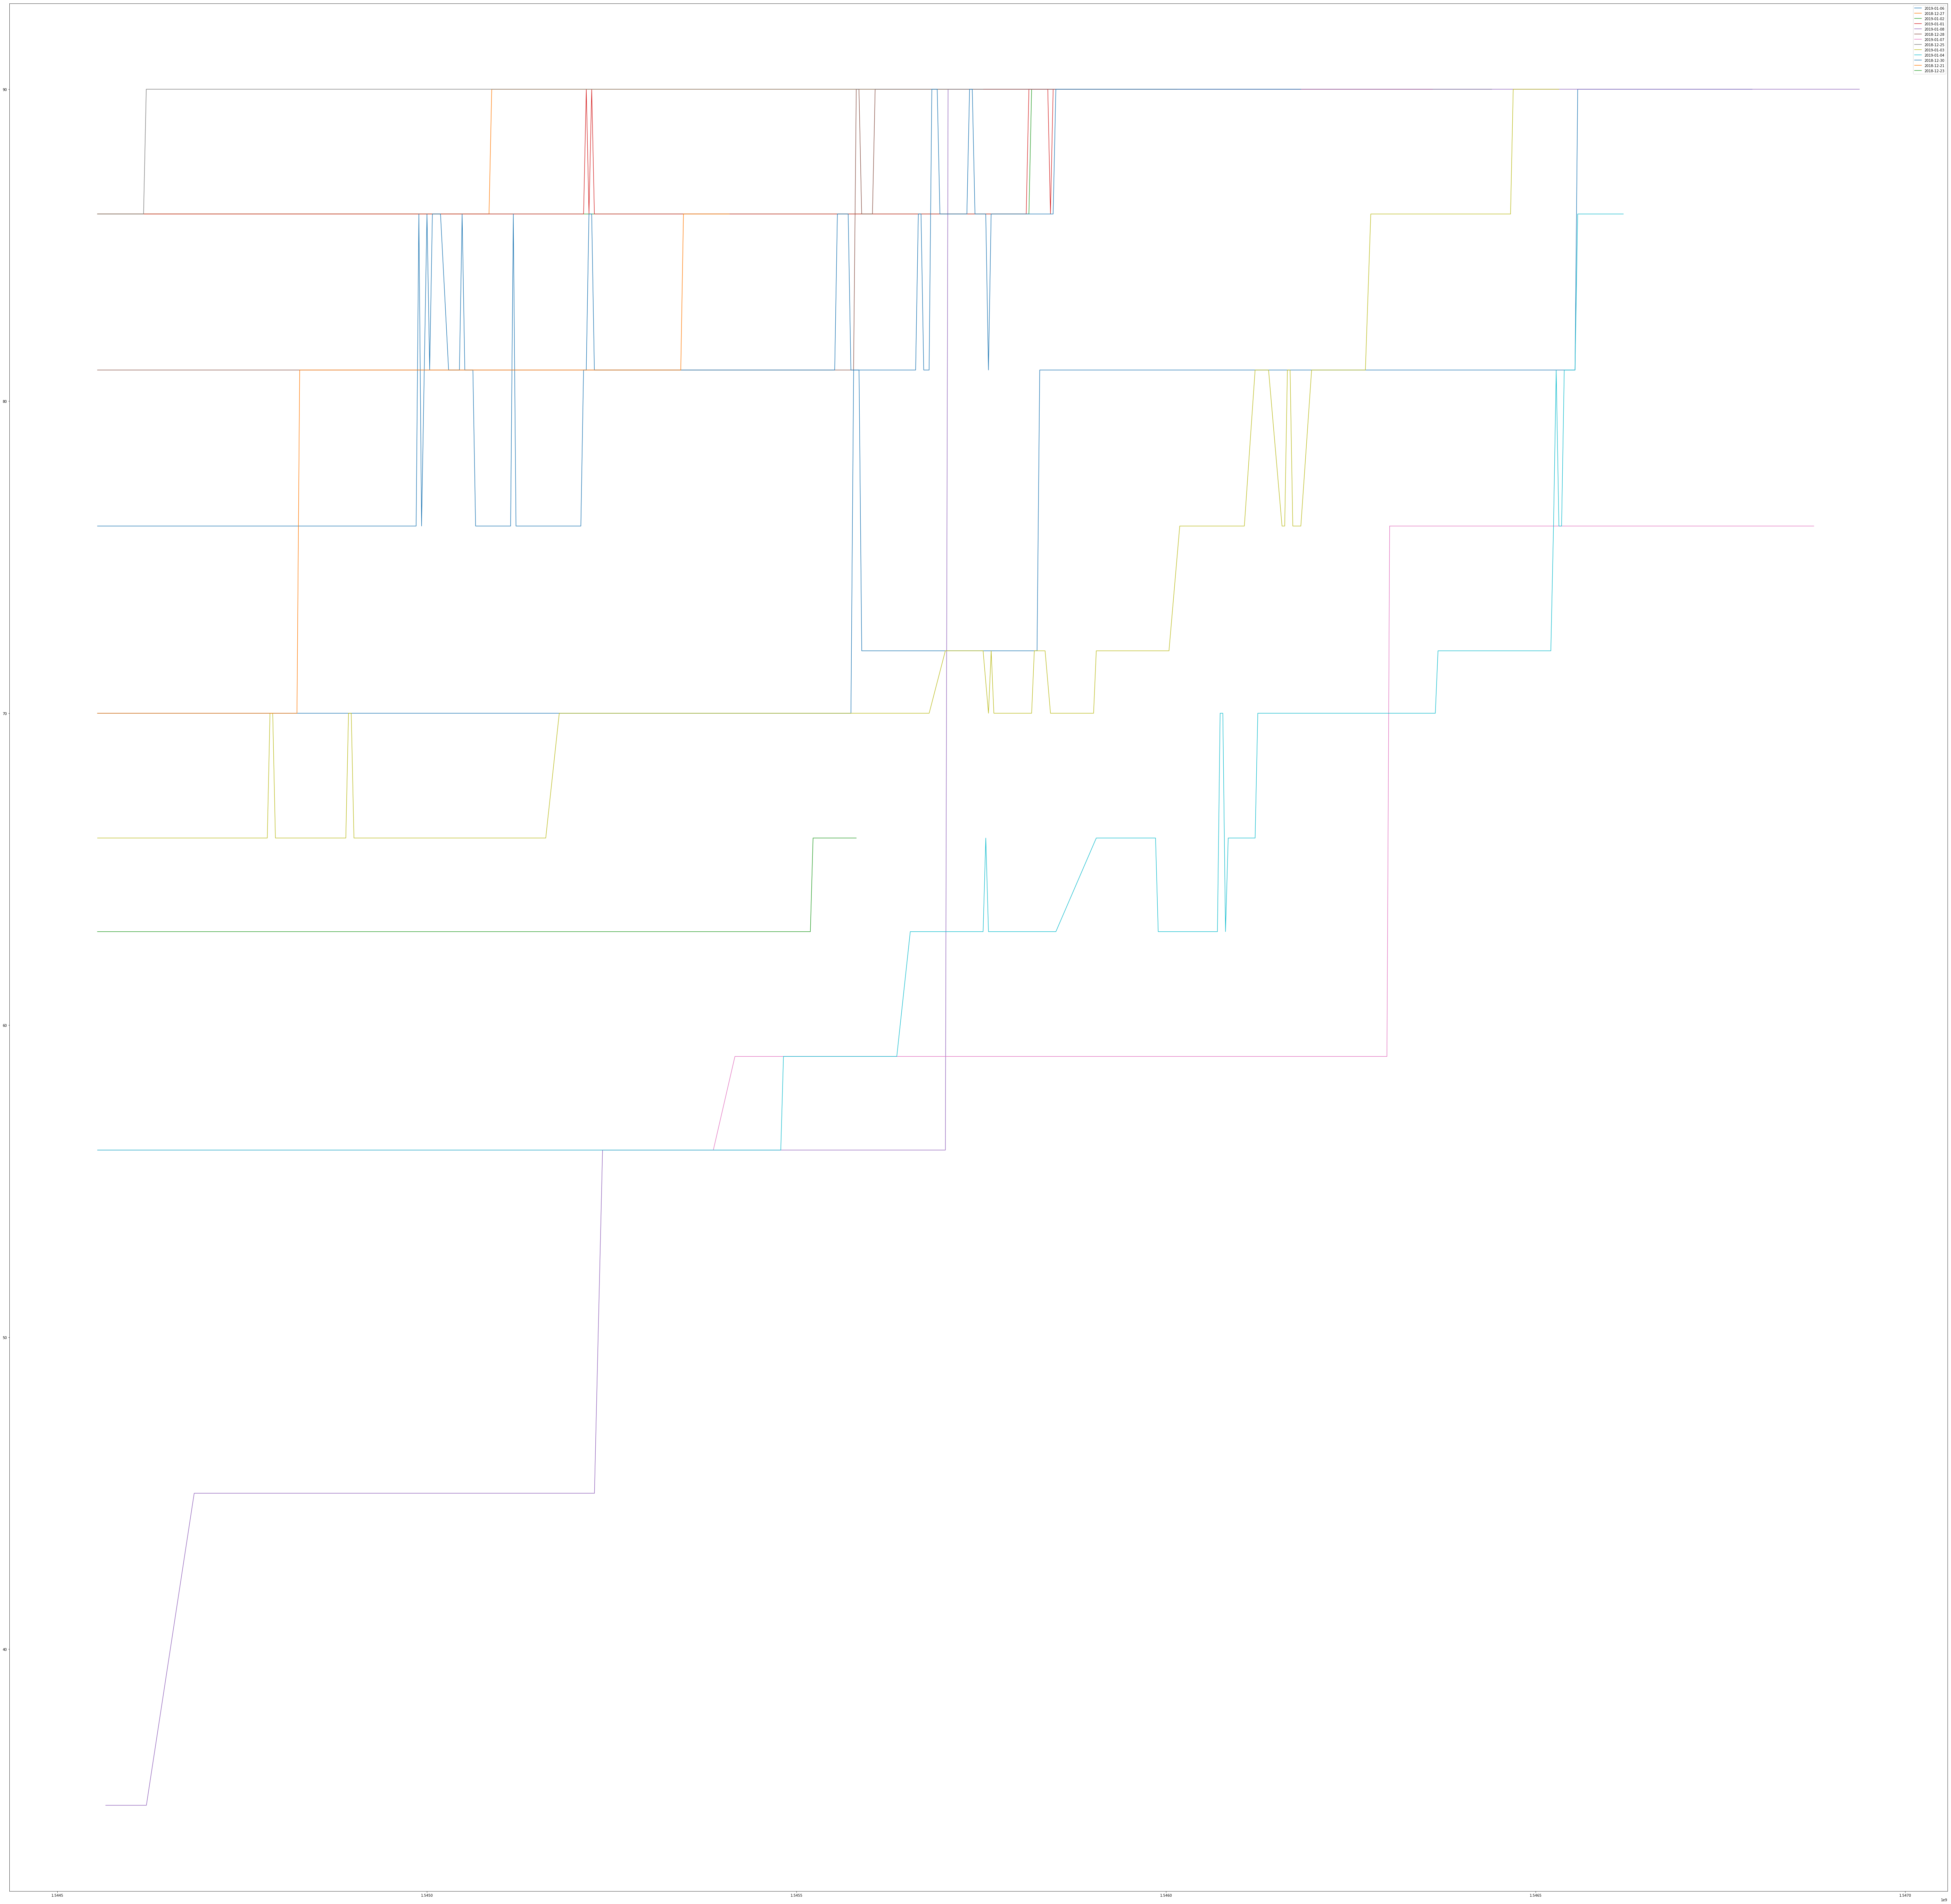

In [414]:
listetrain=df[df["heure_depart"]=="18:35"]
trains={}
plt.figure(figsize=(100,100))
for i in set(listetrain["date_depart"].tolist()):
    trains[i]=listetrain[listetrain["date_depart"]==i]
    plt.plot(trains[i]["timestamp"],trains[i]["prix"],label=i)
plt.legend()

prix AU depart des trains le dernier jour 18h35

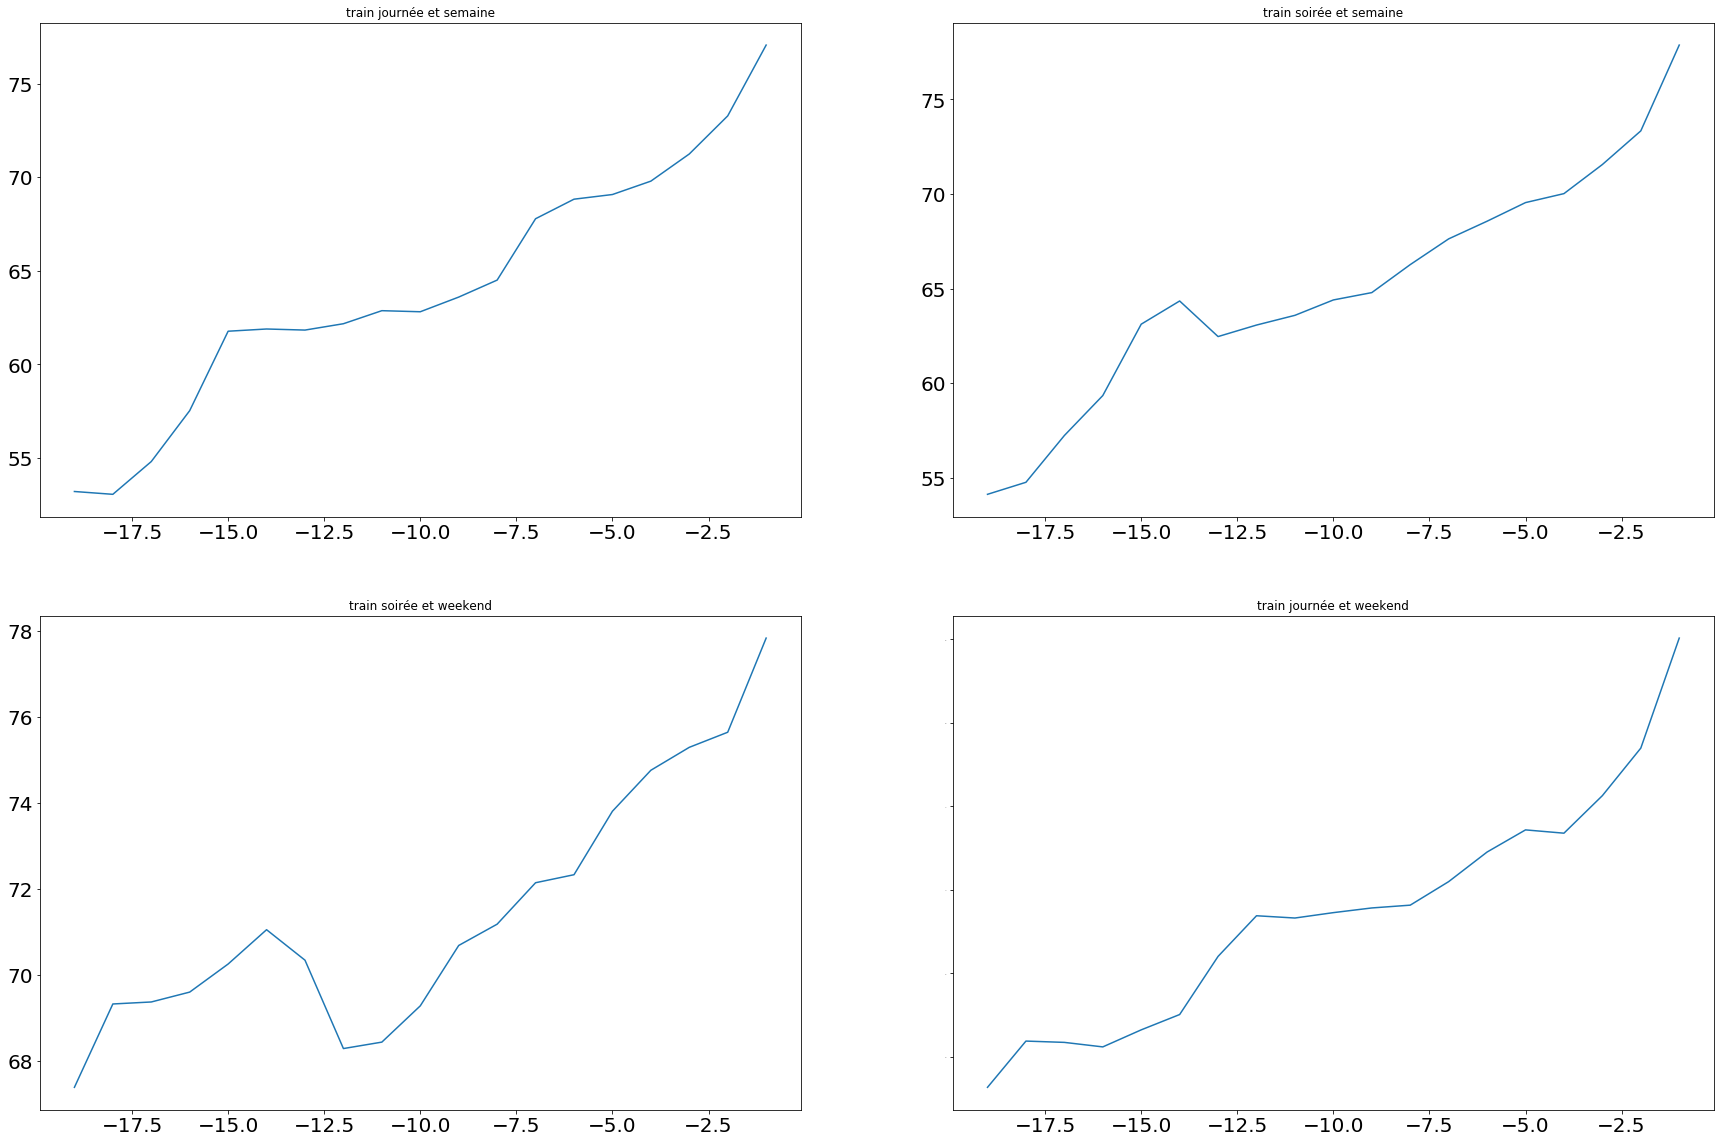

In [70]:

plt.figure(figsize=(30,20))
plt.subplot(2,2,1)

plt.title("train journée et semaine")
d=df[df["weekend"]==False]
d=d[d["Jdepart"]<19]
d=d[d["night"]==False]
Jdepart=d["Jdepart"],
d=d.groupby('Jdepart').mean()
prix=d["prix"].tolist()
prix.reverse()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(list(range(-19,0)),prix)


plt.subplot(2,2,2)
plt.title("train soirée et semaine")
d=df[df["weekend"]==False]
d=d[d["Jdepart"]<19]
d=d[d["night"]==True]
Jdepart=d["Jdepart"],
d=d.groupby('Jdepart').mean()
prix=d["prix"].tolist()
prix.reverse()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(list(range(-19,0)),prix)

plt.subplot(2,2,3)

plt.title("train soirée et weekend")
d=df[df["weekend"]==True]
d=d[d["Jdepart"]<19]
d=d[d["night"]==True]
Jdepart=d["Jdepart"],
d=d.groupby('Jdepart').mean()
prix=d["prix"].tolist()
prix.reverse()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(list(range(-19,0)),prix)

plt.subplot(2,2,4)
plt.title("train journée et weekend")
d=df[df["weekend"]==True]
d=d[d["Jdepart"]<19]
d=d[d["night"]==False]
Jdepart=d["Jdepart"],
d=d.groupby('Jdepart').mean()
prix=d["prix"].tolist()
prix.reverse()
plt.xticks(fontsize=20)
plt.yticks(fontsize=1)
plt.plot(list(range(-19,0)),prix)

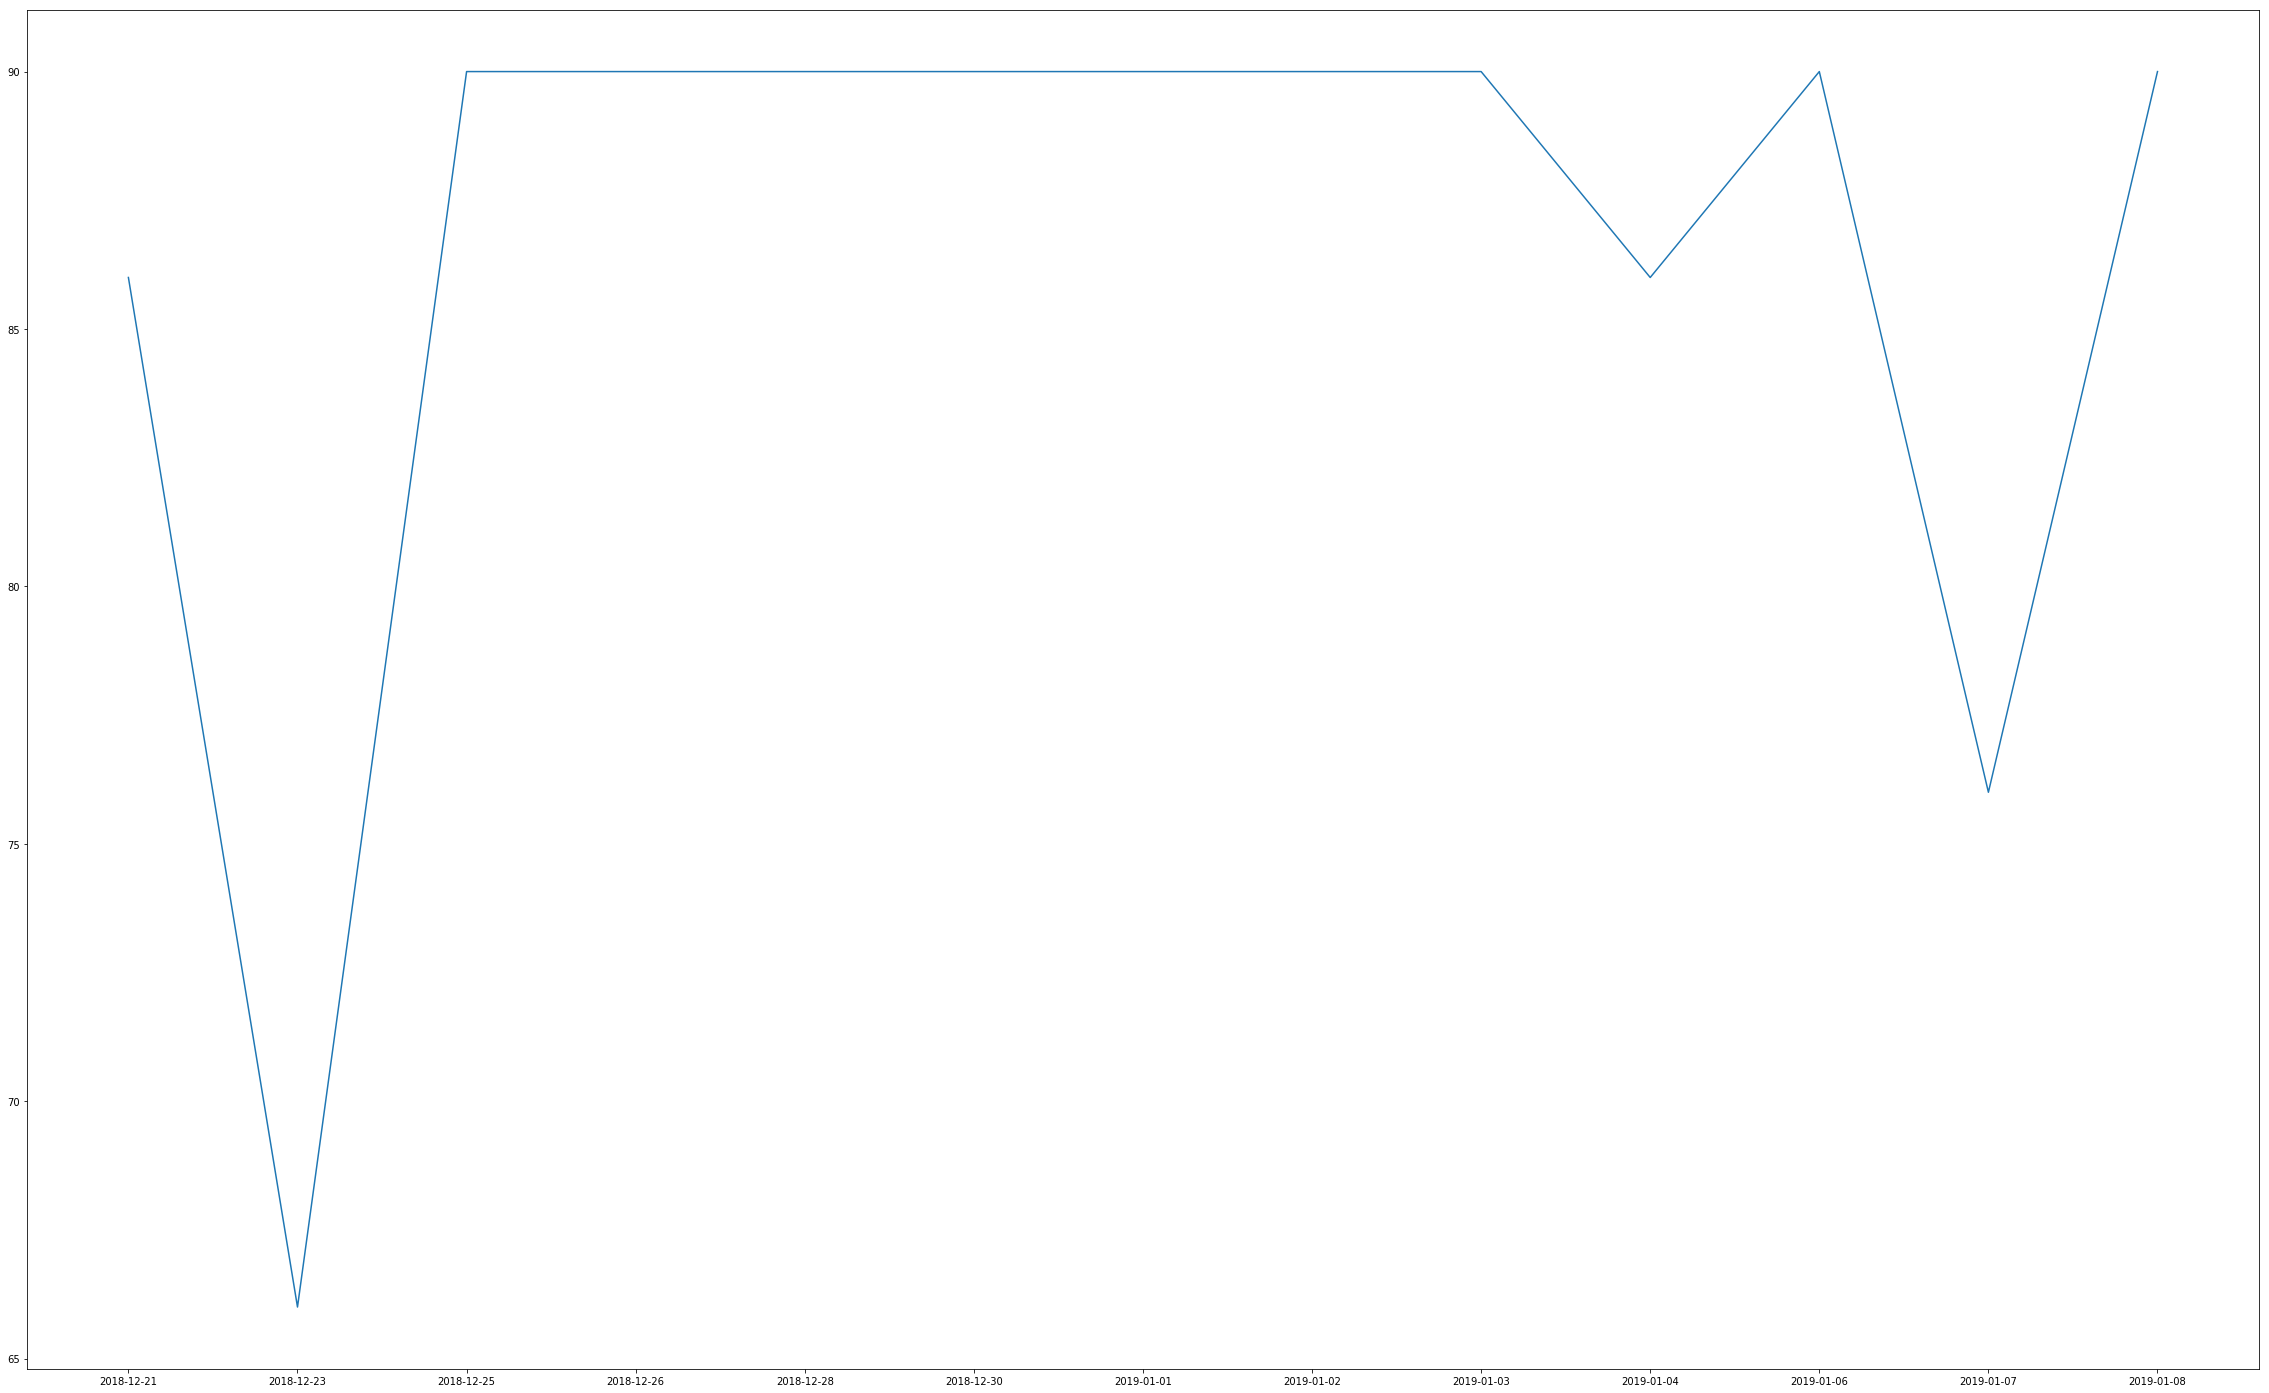

In [415]:
plt.figure(figsize=(40,25))
d=df[df["heure_depart"]=="18:35"]
d=d.groupby('date_depart').tail(1)
plt.plot(d["date"],d["prix"])

prix de depart 18h35, par jour.

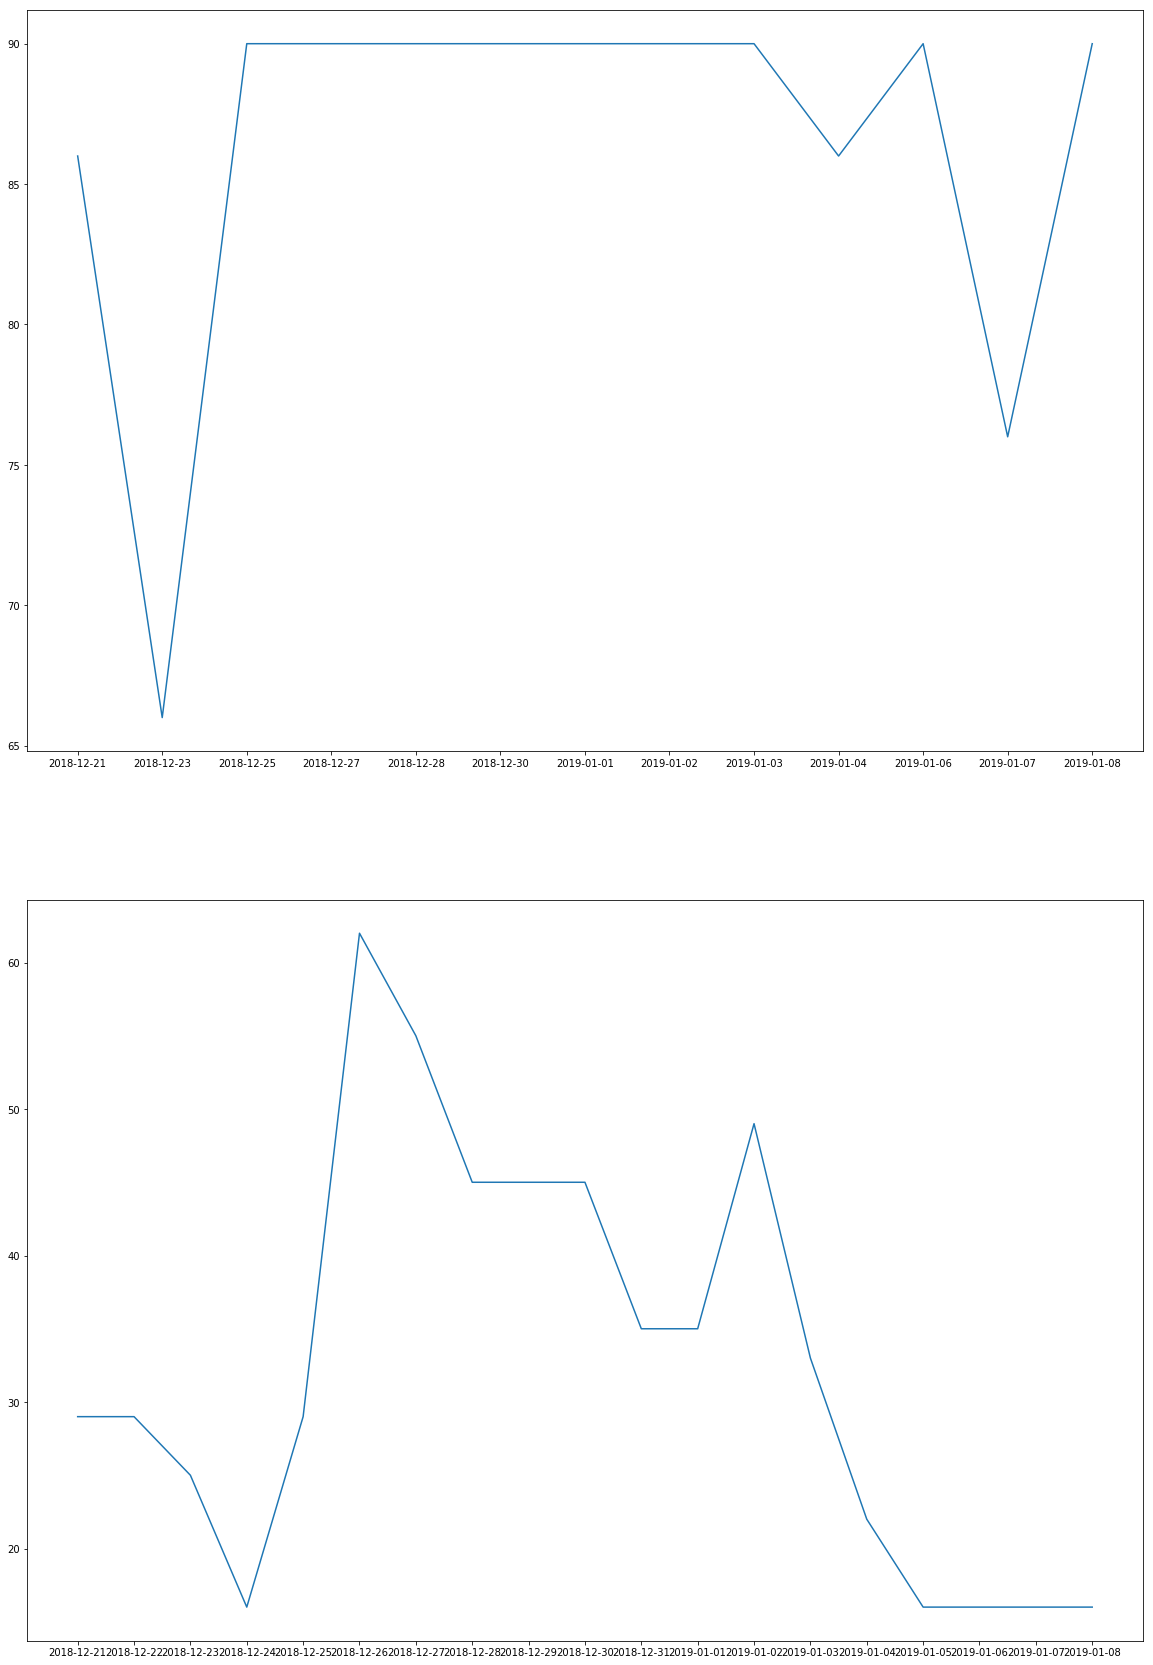

In [83]:
plt.figure(figsize=(20,30))
plt.subplot(2,1,1)
d=df[df["heure_depart"]=="18:35"]
d=d.groupby('date_depart').tail(1)
plt.plot(d["date_depart1"],d["prix"])

d=df[df["heure_depart"]=="18:35"]
df["date_depart1"]=df["date_depart"]
c=df.groupby(["date_depart"]).first()
#df=df.groupby(["date_depart","heure_depart"]).first() #==> interessant, on recupere les premieres infos.
df

plt.subplot(2,1,2)
plt.plot(c["date_depart1"],c["prix"])

prix moyen pour 1 jour avant depart(un peu biaisé...)

min : 56.083999999999996, pour le jour : 2019-01-05, 25 jours avant le depart
min : 32.33552631578947, pour le jour : 2019-01-08, 28 jours avant le depart
min : 55.253993610223645, pour le jour : 2018-12-23, 4 jours avant le depart
min : 73.93383584589614, pour le jour : 2018-12-29, 17 jours avant le depart
min : 56.81553398058252, pour le jour : 2019-01-06, 23 jours avant le depart
min : 57.0536013400335, pour le jour : 2018-12-31, 17 jours avant le depart
min : 69.46153846153847, pour le jour : 2018-12-30, 19 jours avant le depart
min : 42.294938917975564, pour le jour : 2018-12-24, 9 jours avant le depart
min : 40.0625, pour le jour : 2019-01-07, 27 jours avant le depart
min : 69.46129032258065, pour le jour : 2019-01-02, 22 jours avant le depart
min : 72.00628930817611, pour le jour : 2018-12-27, 16 jours avant le depart
min : 65.12061711079944, pour le jour : 2018-12-28, 16 jours avant le depart
min : 80.20938628158845, pour le jour : 2018-12-26, 4 jours avant le depart
min : 41.9

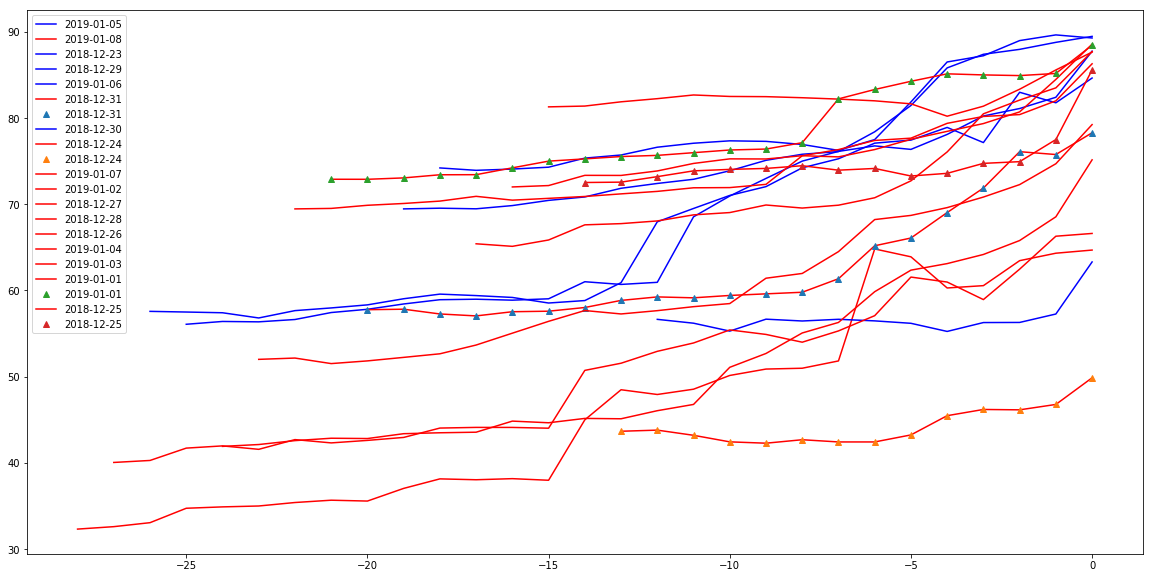

In [151]:
plt.figure(figsize=(20,10))
minindex=[]
for j in set(df["date_depart"]):
    if(j != "2019-01-10" and j != "2019-01-09" and j!="2018-12-12" and j!="2018-12-11" and j!="2018-12-13" and j!="2018-12-14"and\
       j!="2018-12-15"and j!="2018-12-16"and j!="2018-12-17"and j!="2018-12-18"and j!="2018-12-19"and j!="2018-12-20"and j!="2018-12-21"\
      and j!="2018-12-22"):
        moyprix=df[df["date_depart"]==j]
        moyprix=moyprix.groupby("Jdepart",axis=0).mean()
        moyprix["prix"].tolist()
        pl=len(moyprix.index.tolist())*[0]
        abscisse=[]
        for i in range(0,len(moyprix.index.tolist())):
            pl[int(moyprix.index.tolist()[i])]=moyprix["prix"][i]
            abscisse.append(-i)
        moyprix
        if(datetime.datetime.strptime(j, "%Y-%m-%d").weekday()>4):
            plt.plot(abscisse,pl,"b", label=j)
        else:
            plt.plot(abscisse,pl,"r",label=j)
        if(j=="2018-12-24" or j=="2018-12-25" or j=="2018-12-31"or j=="2019-01-01"):
            plt.plot(abscisse,pl,"^", label=j)
        print("min : %s, pour le jour : %s, %s jours avant le depart"%(min(pl),j,-abscisse[pl.index(min(pl))]))
        minindex.append(-abscisse[pl.index(min(pl))])
plt.legend()

print("en moyenne, le moins chere est %s jours avant"%np.mean(minindex))

min : 56.81553398058252, pour le jour : 2019-01-06, 23 jours avant le depart
min : 80.20938628158845, pour le jour : 2018-12-26, 4 jours avant le depart
min : 72.00628930817611, pour le jour : 2018-12-27, 16 jours avant le depart
min : 69.46129032258065, pour le jour : 2019-01-02, 22 jours avant le depart
min : 72.893760539629, pour le jour : 2019-01-01, 20 jours avant le depart
min : 32.33552631578947, pour le jour : 2019-01-08, 28 jours avant le depart
min : 56.083999999999996, pour le jour : 2019-01-05, 25 jours avant le depart
min : 65.12061711079944, pour le jour : 2018-12-28, 16 jours avant le depart
min : 57.0536013400335, pour le jour : 2018-12-31, 17 jours avant le depart
min : 40.0625, pour le jour : 2019-01-07, 27 jours avant le depart
min : 51.52513586956522, pour le jour : 2019-01-03, 21 jours avant le depart
min : 69.46153846153847, pour le jour : 2018-12-30, 19 jours avant le depart
min : 41.925, pour le jour : 2019-01-04, 24 jours avant le depart
min : 73.93383584589614

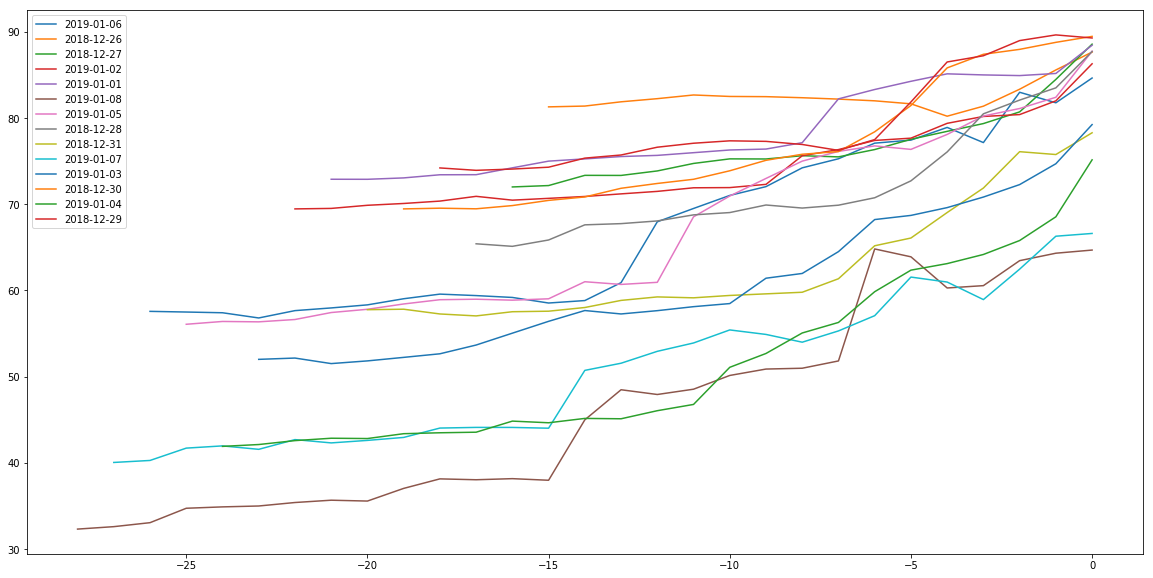

In [418]:
plt.figure(figsize=(20,10))
minindex=[]
for j in set(df["date_depart"]):
    if(j != "2019-01-10" and j != "2019-01-09" and j!="2018-12-12" and j!="2018-12-11" and j!="2018-12-13" and j!="2018-12-14"and\
       j!="2018-12-15"and j!="2018-12-16"and j!="2018-12-17"and j!="2018-12-18"and j!="2018-12-19"and j!="2018-12-20"and j!="2018-12-21"\
      and j!="2018-12-22"and j!="2018-12-23"and j!="2018-12-24"and j!="2018-12-25"):
        moyprix=df[df["date_depart"]==j]
        moyprix=moyprix.groupby("Jdepart",axis=0).mean()
        moyprix["prix"].tolist()
        pl=len(moyprix.index.tolist())*[0]
        abscisse=[]
        for i in range(0,len(moyprix.index.tolist())):
            pl[int(moyprix.index.tolist()[i])]=moyprix["prix"][i]
            abscisse.append(-i)
        moyprix
        plt.plot(abscisse,pl, label=j)
        print("min : %s, pour le jour : %s, %s jours avant le depart"%(min(pl),j,-abscisse[pl.index(min(pl))]))
        minindex.append(-abscisse[pl.index(min(pl))])
plt.legend()

print("en moyenne, le moins chere est %s jours avant"%np.mean(minindex))


In [420]:
a=df.groupby("numero").mean()
a

,prix,type,timestamp,Jdepart,weekend,night,n_semaine,n_heure_depart,n_heure_arrivee,n_heure
numero,,,,,,,,,,
187,34.423423,1.0,1.544973e+09,4.828829,False,False,4.0,14.0,16.000000,11.648649
188,42.106481,1.0,1.544960e+09,4.981481,False,False,4.0,5.0,7.000000,11.587963
189,57.153584,1.0,1.544891e+09,5.781570,False,False,4.0,6.0,8.000000,11.757679
190,37.348416,1.0,1.544963e+09,4.941176,False,False,4.0,9.0,11.000000,11.547511
191,58.450000,1.0,1.544961e+09,4.963636,False,False,4.0,7.0,9.000000,11.568182
192,60.828054,1.0,1.544963e+09,4.941176,False,False,4.0,8.0,10.000000,11.547511
193,59.683258,1.0,1.544973e+09,4.819005,False,True,4.0,19.0,22.000000,11.398190
194,62.488584,1.0,1.544959e+09,4.986301,False,False,4.0,7.0,8.000000,11.593607
195,63.095455,1.0,1.544961e+09,4.963636,False,False,4.0,7.0,9.000000,11.568182


In [132]:
# ,n_heure_depart,n_heure_arrivee,Jdepart,n_semaine,prix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scale = StandardScaler()
a=df[df["Jdepart"]<11]
Y=a["prix"]
X=a[['n_heure_depart', 'n_heure_arrivee','Jdepart','n_semaine']]
X_scaled = scale.fit_transform(X.as_matrix())
X_scaled.T

C:\Users\Guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.05272575, -1.69542024, -1.50118179, ...,  0.2469642 ,
         0.44120264,  0.82967953],
       [ 0.11316847, -1.52983232, -1.34727667, ...,  0.47827976,
         0.47827976,  0.84339104],
       [ 1.54590299,  1.54590299,  1.54590299, ..., -1.74411955,
        -1.74411955, -1.74411955],
       [ 0.48950762,  0.48950762,  0.48950762, ..., -0.976983  ,
        -0.976983  , -0.976983  ]])

regression multivariable.

In [133]:
est = sm.OLS(Y.astype(float), X.astype(float)).fit()
print (est.summary())
def predict_price_of_train(n_heure_depart, n_heure_arrivee,jdepart,n_semaine):
    return 0.4097* n_heure_depart +2.2612 * n_heure_arrivee+1.8490 * jdepart+ 4.7163 * n_semaine
def predict_all(n_heure_depart, n_heure_arrivee,jdepart,n_semaine):
    predicted_prices = []
    n_heure_depart=n_heure_depart.astype(int).tolist()
    n_heure_arrivee= n_heure_arrivee.astype(int).tolist()
    n_semaine=n_semaine.astype(int).tolist()
    jdepart=jdepart.astype(int).tolist()
    for n in range(len(Y)):
        predicted_prices.append(predict_price_of_train(n_heure_depart[n], n_heure_arrivee[n],jdepart[n],n_semaine[n]))
    return predicted_prices
 
#ax = fig.add_subplot(1, 2, 2, projection='3d')
 
#ax.plot_trisurf(df[\"taille_en_pieds_carre\"], df["nb_chambres"], predict_all(df["taille_en_pieds_carre"], df["nb_chambres"]))
 
#plt.show()


                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 1.960e+05
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:14:53   Log-Likelihood:            -5.6459e+05
No. Observations:              120509   AIC:                         1.129e+06
Df Residuals:                  120505   BIC:                         1.129e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
n_heure_depart      0.4097      0.028     

prix moyen en fct des jours restant

Jdepart
19    54.474764
18    56.464467
17    57.573781
16    58.642035
15    60.202508
14    63.285535
12    63.550120
13    63.820882
11    64.135929
10    64.710823
9     65.017944
8     65.757649
7     66.679544
6     68.790756
5     69.750355
4     70.529799
3     71.066477
2     72.475923
1     74.210200
0     78.007924
Name: prix, dtype: float64

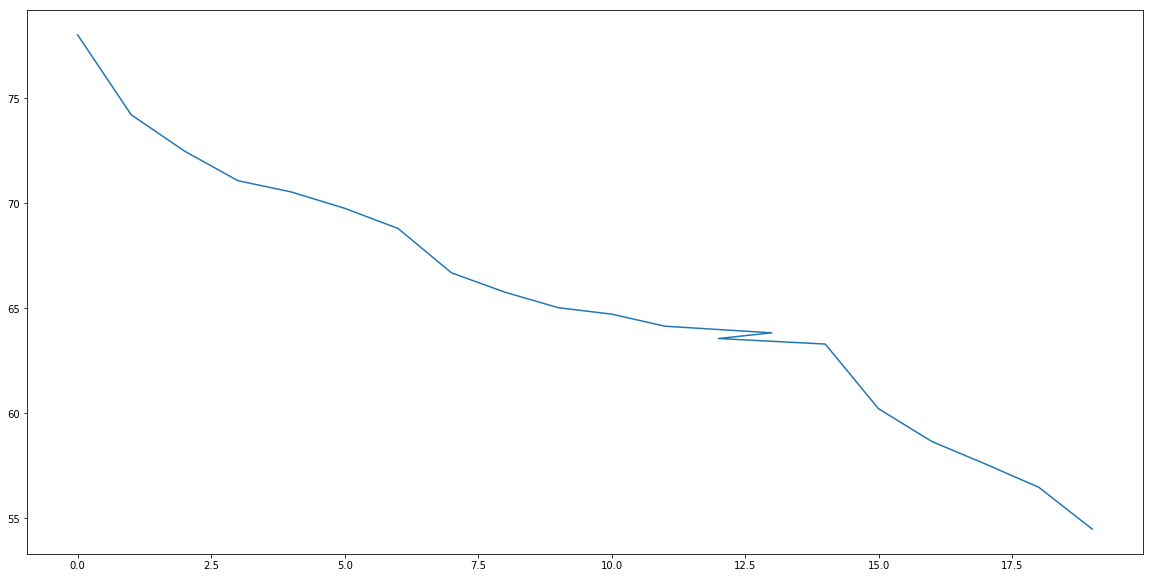

In [429]:
c=df[df["Jdepart"]<20]
c=c.groupby("Jdepart").mean()
plt.figure(figsize=(20,10))
plt.plot(c["prix"].sort_values())
c["prix"].sort_values()

In [91]:
a=df.groupby(["numero"]).last()["prix"]
df["diff"]=1
for i in a.index:
    df.loc[df['numero'] == i, 'diff'] = df[df["numero"]==i]["prix"].apply(lambda x:np.float64(x)-a.loc[i])
df


,date,heure,depart,arrivee,date_depart,heure_depart,heure_arrivee,prix,type,timestamp,...,temps,weekend,night,n_semaine,n_heure_depart,n_heure_arrivee,n_heure,numero,date_depart1,diff
275,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,14:35,16:04,29.0,1,1.544554e+09,...,01:29:00,False,False,4,14,16,19,187,2018-12-21,-31.0
276,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,05:36,07:50,33.0,1,1.544554e+09,...,02:14:00,False,False,4,5,7,19,188,2018-12-21,-23.0
277,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,06:35,08:16,35.0,1,1.544554e+09,...,01:41:00,False,False,4,6,8,19,189,2018-12-21,-41.0
278,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,09:52,11:35,35.0,1,1.544554e+09,...,01:43:00,False,False,4,9,11,19,190,2018-12-21,-9.0
279,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,07:52,09:50,56.0,1,1.544554e+09,...,01:58:00,False,False,4,7,9,19,191,2018-12-21,-7.0
280,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,08:37,10:04,56.0,1,1.544554e+09,...,01:27:00,False,False,4,8,10,19,192,2018-12-21,-10.0
281,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,19:52,22:04,56.0,1,1.544554e+09,...,02:12:00,False,True,4,19,22,19,193,2018-12-21,-14.0
282,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,07:03,08:49,63.0,1,1.544554e+09,...,01:46:00,False,False,4,7,8,19,194,2018-12-21,0.0
283,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,07:35,09:04,63.0,1,1.544554e+09,...,01:29:00,False,False,4,7,9,19,195,2018-12-21,-3.0
284,2018-12-11,19:50:33,Rennes,Paris Montparnasse 1 Et 2,2018-12-21,12:52,14:50,63.0,1,1.544554e+09,...,01:58:00,False,False,4,12,14,19,196,2018-12-21,-9.0


prix moyen par h

C:\Users\Guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


454

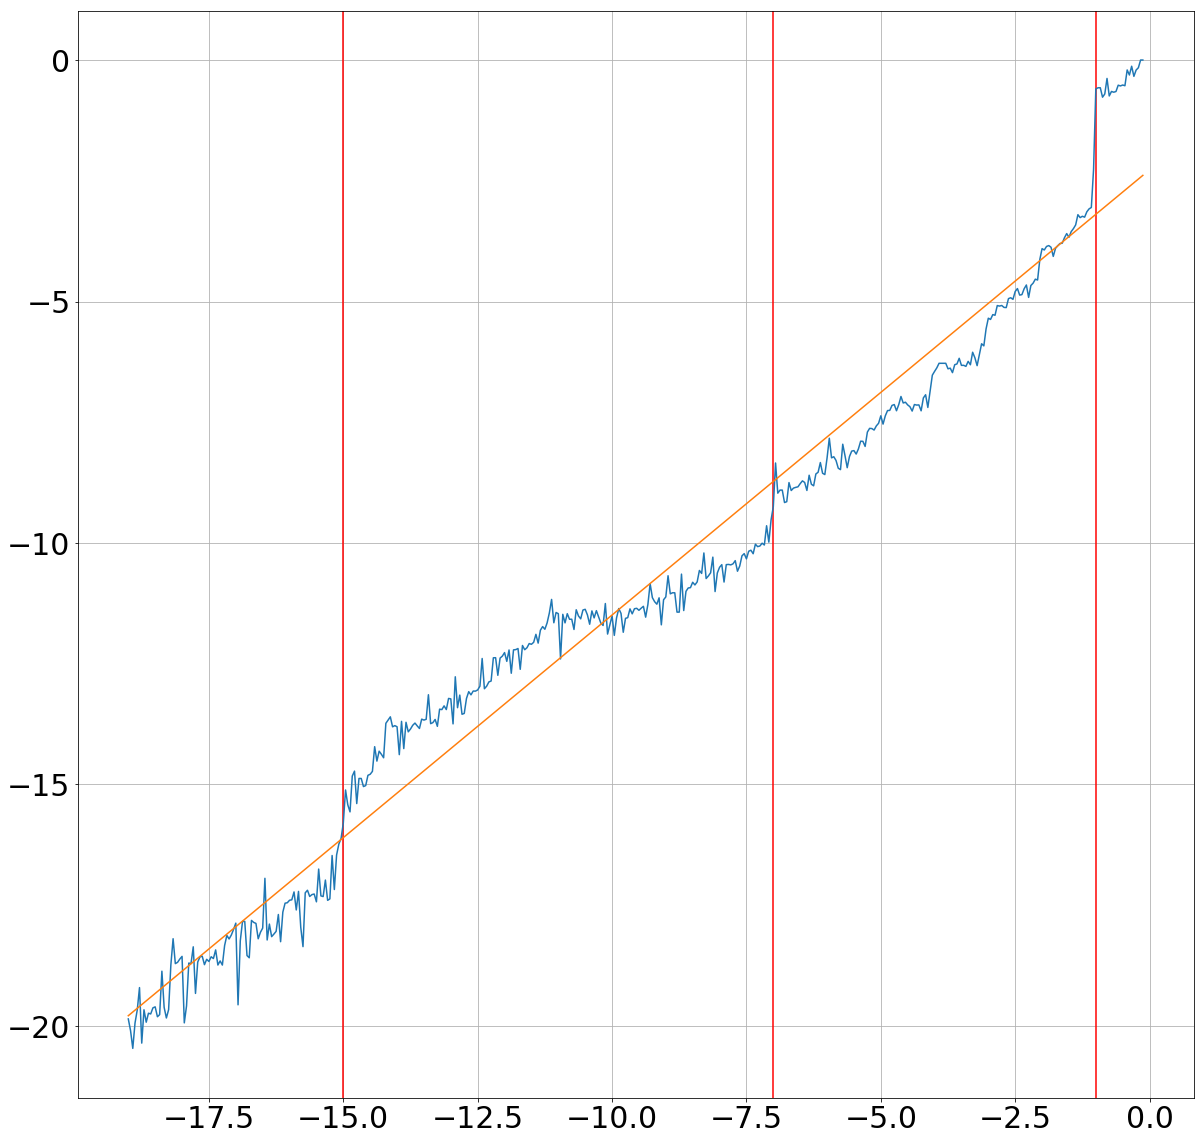

In [127]:
c=df[df["Jdepart"]<19]
c["n_heure"]=c["n_heure"].apply(lambda x: 24-x)
c=c.groupby(["Jdepart","n_heure"]).mean()
plt.figure(figsize=(20,20))
c["diff"]
#plt.plot(c["diff"])
#plt.xlim(left=20)
#plt.ylim(-12,0)
#df
a=c["diff"].to_frame()
#print(a.iloc[2].tolist()[0])
#print(a.index.values)
abscisse=[]
y=[]
prec=0
j=0
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.axvline(x=-15,color='red')
plt.axvline(x=-7,color='red')
plt.axvline(x=-1,color='red')
for i in range(0,len(a.index.values)):
    if(prec!=a.index.values[i][0]):
        j+=1
    abscisse.append(-(j+a.index.values[i][1]/24))
    y.append(a.iloc[i].tolist()[0])
    prec=a.index.values[i][0]
plt.plot(abscisse,y)
plt.plot(abscisse,-2.2730+np.dot(0.9218,abscisse))
plt.grid()
len(a.index.values)

In [119]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
X = abscisse ## X usually means our input variables (or independent variables)
y = c["diff"].tolist() ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:56:44   Log-Likelihood:                -581.48
No. Observations:                 454   AIC:                             1167.
Df Residuals:                     452   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2730      0.083    -27.515      0.000      -2.435      -2.111
x1             0.9218      0.008    122.878      0.000       0.907       0.937
==============================================================================
Omnibus:                       57.575   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.216
Skew:                           0.975   Prob(JB):                     2.82e-17
Kurtosis:                       3.472   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""